In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [6]:
# Display the first few rows to understand the data structure
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [12]:
# Scale 'Amount' and 'Time' columns
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])


In [14]:
# Check class distribution
print("Class distribution before resampling:\n", data['Class'].value_counts(normalize=True))

Class distribution before resampling:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


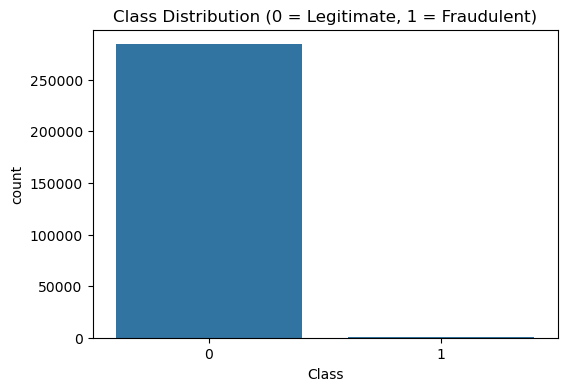

In [16]:
# Visualize class imbalance
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0 = Legitimate, 1 = Fraudulent)")
plt.show()

In [18]:
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [20]:
# Perform undersampling on majority class (legitimate transactions)
fraud = data[data['Class'] == 1]
legitimate = data[data['Class'] == 0].sample(n=len(fraud), random_state=42)
undersampled_data = pd.concat([fraud, legitimate])



In [22]:
# Verify the class distribution after undersampling
print("Class distribution after undersampling:\n", undersampled_data['Class'].value_counts(normalize=True))


Class distribution after undersampling:
 Class
1    0.5
0    0.5
Name: proportion, dtype: float64


In [24]:
# Split the undersampled data into features and target
X_resampled = undersampled_data.drop('Class', axis=1)
y_resampled = undersampled_data['Class']

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [30]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [32]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [36]:
# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[145   1]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       146
           1       0.99      0.88      0.93       150

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296


Accuracy Score: 0.9358108108108109


In [38]:
# Feature Importance Plot
feature_importances = rf_model.feature_importances_
features = X.columns

In [40]:
# Create a DataFrame for visualizing feature importance
feat_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)


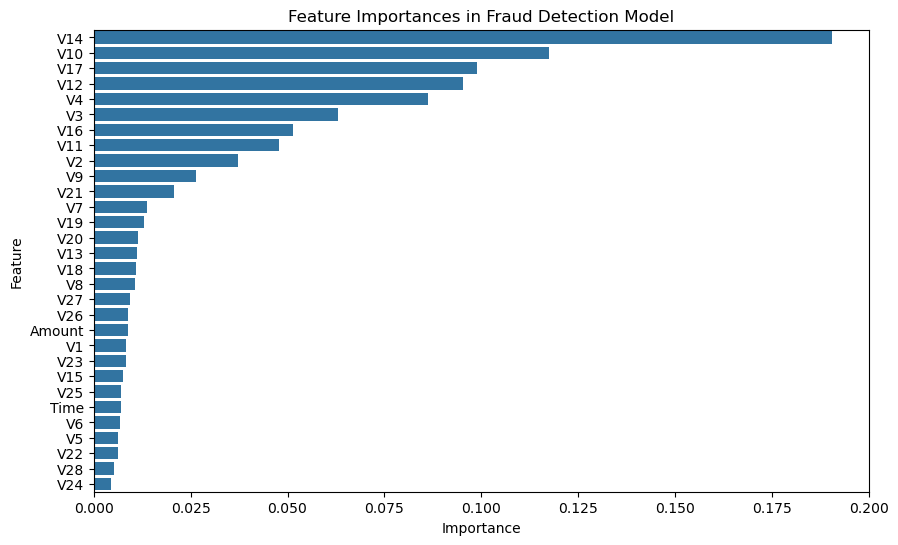

In [42]:
# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title("Feature Importances in Fraud Detection Model")
plt.show()